In [1]:
# Import tensorflow ( we will use keras from tensorflow)
import tensorflow

# Load Keras
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense, Conv3D, Flatten, Reshape, MaxPool3D, UpSampling3D
from tensorflow.keras.models import Model

# Utilities
import numpy as np
import h5py
import math
import os
import sys

# Plotting
import matplotlib.pyplot as plt

# Import classes for training
from generators import chunkgenerator
from TrainingCallback import TraingCallback

In [2]:
# Build functional model
inputs = Input(shape=(128, 128, 16, 126),dtype='float32')
init = 'he_normal'
base_filters = 126
convolutions_per_layer = 8

x = Conv3D(base_filters,kernel_size=(3,3,3),
           padding='same',
           activation='relu',
           kernel_initializer=init)(inputs)

# Attach a conv encoder
for i in range(convolutions_per_layer):
    x = Conv3D(base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)
    
# Save this shortcut to make training a bit easier
shortcut = x
x = MaxPool3D(pool_size=(2,2,2), strides=None, padding='valid')(x)
for i in range(convolutions_per_layer):
    x = Conv3D(2*base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)
    
x = MaxPool3D(pool_size=(2,2,2), strides=None, padding='valid')(x)

for i in range(convolutions_per_layer):
    x = Conv3D(3*base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)
    
x = MaxPool3D(pool_size=(2,2,2), strides=None, padding='valid')(x)

for i in range(convolutions_per_layer):
    x = Conv3D(4*base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)

'''  Image Here is Encoded'''
for i in range(convolutions_per_layer):
    x = Conv3D(3*base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)
    
x = UpSampling3D(size=(2,2,2))(x)

for i in range(convolutions_per_layer):
    x = Conv3D(2*base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)

x = UpSampling3D(size=(2,2,2))(x)
for i in range(convolutions_per_layer):
    x = Conv3D(base_filters,kernel_size=(3,3,3),
               padding='same',
               activation='relu',
               kernel_initializer=init)(x)

x = UpSampling3D(size=(2,2,2))(x)

#Add a shortcut
x = tensorflow.keras.layers.Concatenate()([x, shortcut])

predictions = Conv3D(1,kernel_size=(1,1,1),activation='linear',kernel_initializer=init)(x)

# Setup optimizer
adam = tensorflow.keras.optimizers.Adam(lr=0.0003)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=adam, loss='mean_squared_error')

# Print a summary
#model.summary()

Epoch = 0Loss = 0.2589172


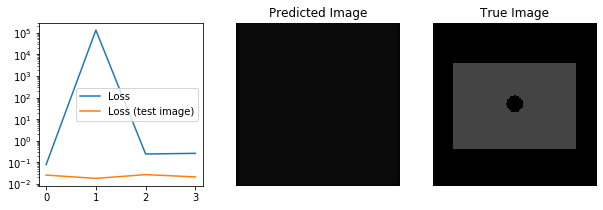

KeyboardInterrupt: 

In [3]:
batch_size=2
epochs=40


data = h5py.File('/raid/Phantom/datasimple.h5','r')
train_gen = chunkgenerator(data,'Train_X','Train_Y',batch_size)
val_gen = chunkgenerator(data,'Val_X','Val_Y',batch_size)

training_callback = TraingCallback(data)

model.fit_generator(generator=train_gen,
          validation_data=val_gen,
          epochs=epochs,
          callbacks=[training_callback],
          verbose=False
         );

model.save("TestModel.h5")